<a href="https://colab.research.google.com/github/alerestrepo185/alerestrepo185.github.io/blob/main/PROYECTO_4_(MACHINE_LEARNING)_RESTREPO%2C_SANTAMARIA%2C_YEPES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO #4**

Paula Alejandra Restrepo Velásquez

Andrés Felipe Santamaria Robayo

Junior Yepes Vasquez

In [ ]:
!pip install wooldridge
import wooldridge as wd
import numpy as np
import pandas as pd

     |████████████████████████████████| 5.1 MB 5.3 MB/s 


In [ ]:
df=wd.data ("crime1")
b_1pcnv = df['pcnv']
b_2avgsen = df['avgsen']
b_3tottime = df['tottime']
b_4inc86 = df['inc86']
Y_nar86 = df['narr86']
b_5pcnvsq = df['pcnvsq']
b_6inc86sq = df['inc86sq']

In [ ]:
b_1pcnv

0       0.38
1       0.44
2       0.33
3       0.25
4       0.00
        ... 
2720    0.00
2721    0.00
2722    0.00
2723    0.00
2724    0.00
Name: pcnv, Length: 2725, dtype: float64

In [ ]:
b_2avgsen

0       17.600000
1        0.000000
2       22.799999
3        0.000000
4        0.000000
          ...    
2720     0.000000
2721     0.000000
2722     0.000000
2723     0.000000
2724     0.000000
Name: avgsen, Length: 2725, dtype: float64

In [ ]:
b_3tottime

0       35.200001
1        0.000000
2       22.799999
3        0.000000
4        0.000000
          ...    
2720     0.000000
2721     0.000000
2722     0.000000
2723     0.000000
2724     0.000000
Name: tottime, Length: 2725, dtype: float64

In [ ]:
b_4inc86

0         0.000000
1         0.800000
2         0.000000
3         8.800000
4         8.100000
           ...    
2720      0.000000
2721     11.500000
2722      1.900000
2723      0.000000
2724    191.300003
Name: inc86, Length: 2725, dtype: float64

In [ ]:
b_5pcnvsq

0       0.1444
1       0.1936
2       0.1089
3       0.0625
4       0.0000
         ...  
2720    0.0000
2721    0.0000
2722    0.0000
2723    0.0000
2724    0.0000
Name: pcnvsq, Length: 2725, dtype: float64

In [ ]:
b_6inc86sq

0           0.000000
1           0.640000
2           0.000000
3          77.440002
4          65.610008
            ...     
2720        0.000000
2721      132.250000
2722        3.610000
2723        0.000000
2724    36595.691406
Name: inc86sq, Length: 2725, dtype: float64

In [ ]:
Y_nar86

0       0
1       2
2       1
3       2
4       1
       ..
2720    1
2721    0
2722    0
2723    1
2724    0
Name: narr86, Length: 2725, dtype: int64

In [ ]:
X_ = df [['pcnv' ,'avgsen', 'tottime', 'inc86']].to_numpy()

In [ ]:
X_

array([[  0.38      ,  17.60000038,  35.20000076,   0.        ],
       [  0.44      ,   0.        ,   0.        ,   0.80000001],
       [  0.33000001,  22.79999924,  22.79999924,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        ,   1.89999998],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 191.30000305]])

In [ ]:
dimensiones=(2725,1)
matriz_unos = np.ones(dimensiones)

In [ ]:
matriz_unos

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
X= np.concatenate((matriz_unos, X_), 1)

In [ ]:
X

array([[  1.        ,   0.38      ,  17.60000038,  35.20000076,
          0.        ],
       [  1.        ,   0.44      ,   0.        ,   0.        ,
          0.80000001],
       [  1.        ,   0.33000001,  22.79999924,  22.79999924,
          0.        ],
       ...,
       [  1.        ,   0.        ,   0.        ,   0.        ,
          1.89999998],
       [  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  1.        ,   0.        ,   0.        ,   0.        ,
        191.30000305]])

In [ ]:
Y = df['narr86'].to_numpy()

In [ ]:
Y

array([0, 2, 1, ..., 0, 1, 0])

In [ ]:

Y.shape

(2725,)

In [ ]:
from numpy.core.fromnumeric import squeeze
class regresion:
  def __init__(self,X,Y):
    self.X = X
    self.Y = Y
    self.n, self.K = X.shape
  def b (self):
    return (np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y).reshape(-1,1) 
  def ee (self):
    beta = self.b().reshape(-1,1)
    self.SRC = np.transpose(self.Y.reshape(-1,1) - self.X @ beta) @ (self.Y.reshape(-1,1) - self.X @ beta)
    self.denominador = self.n - self.K 
    self.sigma_2 = self.SRC / self.denominador
    Mat_var_cov = self.sigma_2 * (np.linalg.inv(X.T @ X))
    return ((np.diag(Mat_var_cov))**(1/2)).reshape(-1,1)
  def t_stat (self):
    errores_est = self.ee().reshape(-1,1)
    return (self.b().reshape(-1,1)/errores_est)
  def conf_int (self):
    self.superior=(self.b()+1.96*self.ee()).squeeze
    self.inferior=(self.b()- 1.96*self.ee()).squeeze
    #self.superior=[round(i, 2) for i in self.superior]
    #self.inferior=[round(i, 2) for i in self.inferior]
    self.inter=list(zip(self.inferior, self.superior))
    print (self.inter)
  def resumen1 (self):
    print('-->betas estimados; cons,pcnv,avgsen,tottime,inc86')
    print(Equipo_1.b())
    print('Esta base de datos representa información sobre crimenes en en USA para el año 1986')
    print('-->errores estandar estimados; cons,pcnv,avgsen,tottime,inc86')
    print(Equipo_1.ee())
    print('las variables representan: pcvn:proporción de condenas anteriores,avgsen:duración de la condena,tottime:tiempo en prisión desde 18 meses,inc86:ingreso superior a $100')
    print('-->t-student; cons,pcnv,avgsen,tottime,inc86')
    print(Equipo_1.t_stat())
    print('--> Por lo que esta regresión  relacionar el numero de arrestos como variable dependiente frente a las demas variables predictoras')
  

In [ ]:
Equipo_1 = regresion(X,Y)

In [ ]:

Equipo_1.b()

array([[ 0.59387489],
       [-0.16243696],
       [-0.00618803],
       [ 0.00771062],
       [-0.00243615]])

In [ ]:

Equipo_1.ee()

array([[0.02585771],
       [0.04081609],
       [0.01238073],
       [0.009432  ],
       [0.00024321]])

In [ ]:
Equipo_1.t_stat()

array([[ 22.9670375 ],
       [ -3.97972866],
       [ -0.49981111],
       [  0.81749603],
       [-10.01685265]])

In [ ]:
Equipo_1.resumen1()

-->betas estimados; cons,pcnv,avgsen,tottime,inc86
[[ 0.59387489]
 [-0.16243696]
 [-0.00618803]
 [ 0.00771062]
 [-0.00243615]]
Esta base de datos representa información sobre crimenes en en USA para el año 1986
-->errores estandar estimados; cons,pcnv,avgsen,tottime,inc86
[[0.02585771]
 [0.04081609]
 [0.01238073]
 [0.009432  ]
 [0.00024321]]
las variables representan: pcvn:proporción de condenas anteriores,avgsen:duración de la condena,tottime:tiempo en prisión desde 18 meses,inc86:ingreso superior a $100
-->t-student; cons,pcnv,avgsen,tottime,inc86
[[ 22.9670375 ]
 [ -3.97972866]
 [ -0.49981111]
 [  0.81749603]
 [-10.01685265]]
--> Por lo que esta regresión  relacionar el numero de arrestos como variable dependiente frente a las demas variables predictoras


- intercepto: 0.5938749 (0.0258577),  t-stat:22.97 representa como manteniendo constante las demas variables, el número de arrestos es de 0.5938 

- pcnv:-162437 (0.0408161), t-stat=-3.98, esta valor arroja la relación inversa en entre la proporción de condenas anteriores y las veces de arresto; por cada año de arresto anteriormente t-1, las veces arrestado se reduce en 0.162. esta variable es altamente significativa, con el error estandar y el t-student se encuentra en la región de aceptación.  

- avgsen: -.006188 (0.123807) t-stat:-0.50, esta variable que si bien no es significativa en el modelo, aceverá la relación de que entre mayor años duración de las condenas, se reduce las veces de arresto en .006.

- tottime: .0077106 (0.009432) t-stat:0.82, esta variable representa como a medida que la cadena aumenta, los números de arrestros disminuyen en 0.007; sin embargo esta según la inferencia estadistica, no es significativa en el modelo; el tiempo en prisión no explica los numeros de arrestos para esta población estudiada.

- inc86:-0.0024362 (0.0002432) t-stat:-10.2, esta variable predicha indica una relación inversa entre el ingreso y los números de veces de arrestos, ante el incremento de $100 en el ingreso, disminuyen las veces de arresto en 0.002432, esto siendo altamente significativos a la hora de la justificación del modelo.

- Finalmente se encuentra como las variables de la proporción de condenas anteriores y el ingreso superior a $100, explican con gran significancia estadistica el número de veces de arrestos , sin embargo las demas variables especificadas al no ser significativas, podrían estar causando ruido en el modelo, inflando las varianzas y perjudicando la inferencia estadistica. Se podría efectuar una prueba F para determinar el uso de estas variables afecta la predición de la variable independiente.      




In [ ]:
b5_b6 = df [['pcnvsq' ,'inc86sq']].to_numpy()

In [ ]:
b5_b6

array([[1.44400001e-01, 0.00000000e+00],
       [1.93599999e-01, 6.40000045e-01],
       [1.08900011e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.60999990e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.65956914e+04]])

In [ ]:
X_2 = np.concatenate((X,b5_b6), 1)

In [ ]:
X_2

array([[1.00000000e+00, 3.79999995e-01, 1.76000004e+01, ...,
        0.00000000e+00, 1.44400001e-01, 0.00000000e+00],
       [1.00000000e+00, 4.39999998e-01, 0.00000000e+00, ...,
        8.00000012e-01, 1.93599999e-01, 6.40000045e-01],
       [1.00000000e+00, 3.30000013e-01, 2.27999992e+01, ...,
        0.00000000e+00, 1.08900011e-01, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.89999998e+00, 0.00000000e+00, 3.60999990e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.91300003e+02, 0.00000000e+00, 3.65956914e+04]])

In [ ]:
class regresion2:
  def __init__(self,X,Y):
    self.X = X_2
    self.Y = Y
    self.n, self.K = X.shape
  def b (self):
    return (np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y).reshape(-1,1) 
  def ee (self):
    beta = self.b().reshape(-1,1)
    self.SRC = np.transpose(self.Y.reshape(-1,1) - self.X @ beta) @ (self.Y.reshape(-1,1) - self.X @ beta)
    self.denominador = self.n - self.K 
    self.sigma_2 = self.SRC / self.denominador
    Mat_var_cov = self.sigma_2 * (np.linalg.inv(X.T @ X))
    return ((np.diag(Mat_var_cov))**(1/2)).reshape(-1,1)
  def t_stat(self):
    errores_est = self.ee().reshape(-1,1)
    return (self.b().reshape(-1,1)/errores_est)
  def conf_int (self):
    self.superior=(self.b()+1.96*self.ee()).squeeze
    self.inferior=(self.b()- 1.96*self.ee()).squeeze
    #self.superior=[round(i, 2) for i in self.superior]
    #self.inferior=[round(i, 2) for i in self.inferior]
    self.inter=list(zip(self.inferior, self.superior))
    print (self.inter)
  def resumen2 (self):
    return 

In [ ]:
Equipo_1_1 = regresion2(X,Y)

In [ ]:
Equipo_1_1.b()

array([[ 5.77523688e-01],
       [ 6.22634460e-01],
       [-6.92546885e-03],
       [ 4.48874198e-03],
       [-4.08083748e-03],
       [-8.26588291e-01],
       [ 8.56614968e-06]])

In [ ]:
Equipo_1_1.SRC

array([[1892.89141675]])

In [ ]:
Equipo_1_1.t_stat()

AttributeError: ignored


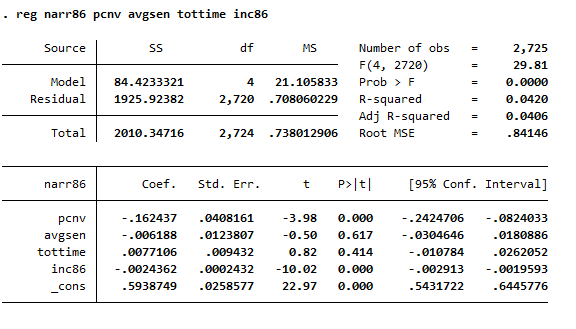